(ch:probability)=
# 확률분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

확률변수와 확률분포를 소개한다.

**모집단과 표본 (요약)**

확률분포와 확률변수를 설명하기 위해 캘리포니아 주택가격 데이터셋을 활용한다.
먼저 {numref}`%s장 <ch:smapling>`에서 다룬 내용을 요약한다.

- 캘리포니아 주택가격 데이터셋

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- 가구중위소득과 주택중위가격만 활용

In [8]:
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


- 이상치 제거: 중위주택가격이 50만을 초과하는 경우 삭제 후 인덱스 초기화

In [9]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


- 중위소득 범주 특성 추가

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing

,median_income,median_house_value,income_cat
district,,,
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
19670,1.5603,78100.0,2
19671,2.5568,77100.0,2
19672,1.7000,92300.0,2


- 소득 범주별 그룹화: 그룹별 표본 크기 확인

In [11]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


- 무작위 추출: 모집단의 10% 무작위 추출

In [12]:
random_sampling = housing.sample(frac=0.1, random_state=42)
random_sampling

,median_income,median_house_value,income_cat
district,,,
14447,1.8357,104200.0,2
13921,4.2109,171200.0,3
12981,4.0481,97300.0,3
2579,3.5380,102700.0,3
12162,2.2000,116500.0,2
...,...,...,...
19377,6.6246,284200.0,5
485,2.9405,289500.0,2
5018,1.6027,97300.0,2


- 무작위 추출된 표본의 소득 범주별 그룹 크기

In [13]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,87,87
2,644,644
3,702,702
4,347,347
5,188,188


- 무작위 추출된 표본의 소득 범주별 상대도수

In [14]:
random_total = random_sampling_count.sum()
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.044207,0.044207
2,0.327236,0.327236
3,0.356707,0.356707
4,0.176321,0.176321
5,0.095528,0.095528


- 모집단의 소득 범주별 상대도수

In [15]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


- 소득 범주별 상대도수 비교

In [16]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]], 
                         random_sampling_ratio.iloc[:, [1]]],
                        axis=1)

proportions.columns = ['전체', '무작위 추출']
proportions.index.name = '소득 범주'
proportions

,전체,무작위 추출
소득 범주,,
1,0.041372,0.044207
2,0.333011,0.327236
3,0.361017,0.356707
4,0.177992,0.176321
5,0.086607,0.095528


## 확률분포

모집단에서 임의로 표본을 선택하는 무작위 추출<font size='2'>random sampling</font> 방식의
결과는 미리 알 수 없다.
또한 무작위 추출을 실행할 때마다의 결과는 일반적으로 다르다. 
하지만 무작위 추출을 실행할 때 어떤 값이 나올 확률을 계산할 수 있는 경우가 있다.

예를 들어, 주사위를 던질 때 나오는 값은 1부터 6까지의 정수 중에서 무작위로 하나의 수를 선택하는
무작위 추출이다.
주사위를 던지면 어떤 값이 나올지는 모르지만 1부터 6까지의 정수 각각이 1/6의 확률로 나온다는
사실은 잘 알려져 있다.

### 확률변수와 확률분포

주사위를 던졌을 때 나올 수 있는 값을 가리키는 변수를 $X$라 하자.
$X$가 가리키는 값이 나올 확률은 정상적인 주사위인 경우 항상 1/6이다.
이처럼 무작위 추출을 수행할 때 어떤 값이 나올지를 미리 알 수는 없지만 
어떤 값이 나올 확률이 알려진 값을 가리키는 변수를
확률변수<font size='2'>random variable</font>라 부른다.

확률변수 $X$가 가리키는 값이 $x_k$이고 $x_k$가 발생할 확률이 $p_k$일 때 다음과 같이 표기한다.

$$
P(X=x_k) = p_k
$$

예를 들어 주사위를 던졌을 때 나오는 값을 가리키는 확률변수 $X$가
1부터 6까지의 정수를 가리키는 확률이 동일하게 1/6이라는 
사실은 다음과 같이 표현된다.

$$
P(X=1) = P(X=2) = \cdots = P(X=6) = \frac1 6
$$

확률분포는 확률변수가 가리킬 수 있는 값에 대한 확률들로 구성된 표를 가리킨다.
예를 들어, 주사위를 던졌을 때 나오는 값을 가리키는 확률변수 $X$의 확률분포는 다음과 같다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

확률변수 $X$의 확률분포가 알려졌을 때 '확률변수 $X$는 해당 확률분포를 따른다' 라고 말한다.
예를 들어 주사위를 던졌을 때 나오는 값을 가리키는 변수 $X$는 위 확률분포를 따른다.

### 무작위 추출의 확률분포

`housing` 데이터셋을 이용하여 모집단의 확률분포와 무작위 추출의 관계를 설명한다.

변수 $X$가 `housing` 데이터셋에서 임의로 선택된 구역의 소득범주를 가리키도록 했을 때,
$X$는 아래 확률분포를 따르는 확률변수가 된다.

| X | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

이유는 앞서 계산한 소득 범주별 상대도수가 다음과 같기 때문이다.

In [17]:
proportions

,전체,무작위 추출
소득 범주,,
1,0.041372,0.044207
2,0.333011,0.327236
3,0.361017,0.356707
4,0.177992,0.176321
5,0.086607,0.095528


위 표의 `무작위 추출(%)` 특성에서 확인되듯이
19,674구역의 10%인 1,968개 구역을 임의로 추출했을 때 소득 범주별 상대도수가 모집단의 상대도수와 유사하다.

**`plt.hist()` 함수 활용**

아래 코드는 무작위 추출 표본의 소득 범주별 상대도수 히스토그램을
모집단의 소득 범주별 상대도수 히스토그램과 비교한다.
`plt.hist()` 함수를 호출할 때 `density=True`를 지정하면 도수 대신에 상대도수를 막대그래프 형식으로 그림에 주의한다.

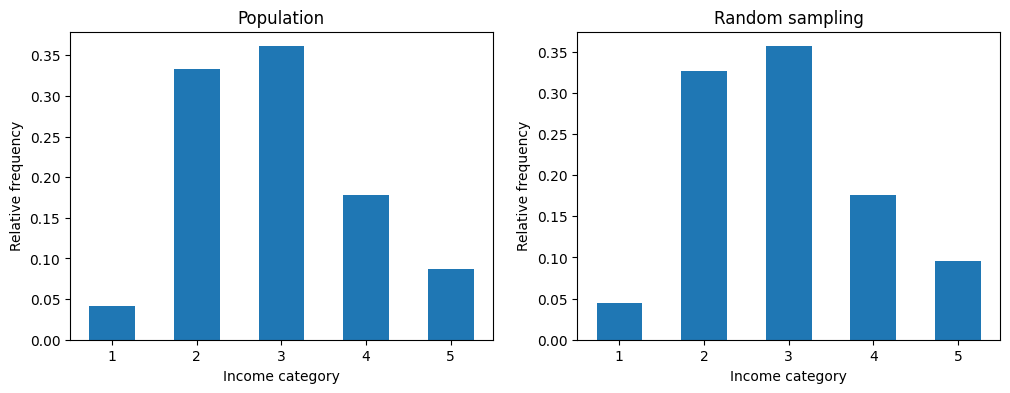

In [18]:
income_cat = housing['income_cat']
income_cat_random = random_sampling['income_cat']

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(income_cat, bins=5, range=(1, 6), density=True, rwidth=0.54)
ax1.set_xticks(np.linspace(1.5, 5.5, 5))
ax1.set_xticklabels(np.arange(1, 6))
ax1.set_xlabel('Income category')
ax1.set_ylabel('Relative frequency')
ax1.set_title('Population')

ax2.hist(income_cat_random, bins=5, range=(1, 6), density=True, rwidth=0.54)
ax2.set_xticks(np.linspace(1.5, 5.5, 5))
ax2.set_xticklabels(np.arange(1, 6))
ax2.set_xlabel('Income category')
ax2.set_ylabel('Relative frequency')
ax2.set_title('Random sampling')

plt.show()

이렇듯 무작위 추출의 결과는 모집단의 확률분포와 밀접하게 관련된다.
실제로 표본의 크기가 적절히 크면 표본의 확률분포는 모집단의 확률분포와 매우 가까워진다.

하지만 이는 특별한 확률분포를 따르는 모집단을 대상으로 진행한 무작위 추출의 결과에 대한 이야기다.
무작위 추출 자체는 실제로는 모집단의 확률분포와 상관없이 임의로 표본을 추출한다.
여기서 말하는 '임의로'는 '균등하게'를 의미한다.

## 균등분포

아래 코드에서 사용된 데이터프레임의 `sample()` 메서드는 
`housing` 모집단에서 10%의 표본을 무작위로 추출한다.

```python
housing.sample(frac=0.1, random_state=42)
```

`sample` 메서드는 실제로는 `housing`의 인덱스로 사용된
0부터 19,674까지의 정수를 전 영역에서 골고루 1,968개 선택한다.

In [19]:
housing_index = housing.index
housing_index

RangeIndex(start=0, stop=19675, step=1, name='district')

아래 코드는 인덱스를 대상으로 `sample()` 메서드를 실행할 때
선택된 정수가 전 영역에 걸쳐 골고루 분포됨을 시각적으로 보여준다.
`plt.hist()` 함수 호출에 사용된 키워드 인자는 다음과 같다.

- `bins=50`: 0부터 19,674 사이의 범위를 50개의 구간으로 쪼갬. 각 구간의 크기는 약 400.
- `rwidth=0.7`: 구간별 막대그래프의 너비를 0.7배 만큼 좁혀서 막대들을 구분함.

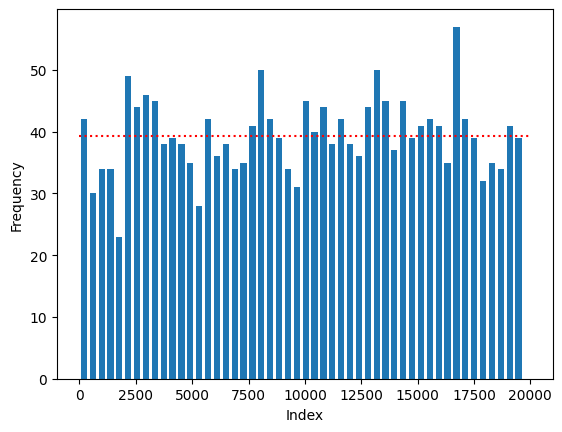

In [20]:
freq, edges, _ = plt.hist(random_sampling.index, bins=50, range=(0, 19674), rwidth=0.7)
plt.hlines(1968/50, 0, 20000, color='red', linestyles='dotted')

plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

`random_sampling` 표본의 크기가 1,968이고, 인덱스의 범위를 50개 구간으로 쪼갰기에
각각의 구간은 평균적으로 약 40개의 인덱스를 포함해야 하며
빨간 점선이 이를 가리킨다.

실제로 각 구간별 도수와 평균값은 다음과 같다.

- 구간별 도수

In [21]:
freq

array([42., 30., 34., 34., 23., 49., 44., 46., 45., 38., 39., 38., 35.,
       28., 42., 36., 38., 34., 35., 41., 50., 42., 39., 34., 31., 45.,
       40., 44., 38., 42., 38., 36., 44., 50., 45., 37., 45., 39., 41.,
       42., 41., 35., 57., 42., 39., 32., 35., 34., 41., 39.])

- 구간별 도수 평균값

In [22]:
np.mean(freq)

39.360000

변수 `Y`가 `sampling_index`에 포함된 정수가 50개 구간 어디에 속하는지 확률을 가리키는 확률변수라 하자.
그러면 `Y`가 임의의 구간 `k`를 가리킬 확률은 평균적으로 2%이어야 한다.
즉 다음이 성립한다.

$$
P(Y = k) \simeq 0.02
$$

이유는 2000여개의 데이터가 50개 구간에 균등하게 40여개씩 나뉘어서 분류되었기 때문이다.

이를 실제 데이터로 확인할 수 있다.

- 구간별 상대도수

In [23]:
freq/1968

array([0.021341, 0.015244, 0.017276, 0.017276, 0.011687, 0.024898,
       0.022358, 0.023374, 0.022866, 0.019309, 0.019817, 0.019309,
       0.017785, 0.014228, 0.021341, 0.018293, 0.019309, 0.017276,
       0.017785, 0.020833, 0.025407, 0.021341, 0.019817, 0.017276,
       0.015752, 0.022866, 0.020325, 0.022358, 0.019309, 0.021341,
       0.019309, 0.018293, 0.022358, 0.025407, 0.022866, 0.018801,
       0.022866, 0.019817, 0.020833, 0.021341, 0.020833, 0.017785,
       0.028963, 0.021341, 0.019817, 0.01626 , 0.017785, 0.017276,
       0.020833, 0.019817])

- 구간별 상대도수 평균값

In [24]:
np.mean(freq/1968)

0.020000

확률변수 `Y`처럼 임의의 값에 대해 (거의) 동일한 확률을 갖는 확률분포를 
**균등분포**<font size='2'>uniform distribution</font>라 부른다.

### `np.random.choice()` 함수

데이터프레임의 `sample()` 메서드는 앞서 설명한대로 모집단 전체에서 소득 범주에 상관없이
인덱스를 기준으로 균등하게 표본을 추출한다.
실제로 `np.random.choice()` 함수를 이용하여 동일한 결과를 얻을 수 있다.

아래 코드는 0부터 19,674까지의 정수 중에서 무작위로 1,968개의 정수를
중복 없이 추출한다.
무작위 추출의 시드를 42로 지정함에 주의한다.
이유는 앞서 `sample()`를 활용할 때 `random_state=42` 키워드 인자를 사용하여 동일한 시드를 지정했기 때문이다.

In [25]:
np.random.seed(42)
random_choice = np.random.choice(range(0, 19675), 1968, replace=False)

In [26]:
random_choice

array([14447, 13921, 12981, ...,  5018,   967,  3975])

선택된 정수를 크기순으로 정렬한 다음에 처음 10개의 값을 확인한다.

In [27]:
random_choice.sort()
random_choice[:10]

array([  3,   6,  17,  35,  42,  57,  59, 103, 115, 127])

`random_sampling` 데이터프레임의 인덱스를 크기순으로 정렬한 다음에 확인되는 처음 10개의 값과 동일하다.

In [28]:
random_index = np.array(random_sampling.index)
random_index.sort()
random_index[:10]

array([  3,   6,  17,  35,  42,  57,  59, 103, 115, 127])

처음 10개만이 아니라 두 표본 전체를 확인해도 모든 항목이 동일하다.
넘파이 어레이의 `all()` 메서드는 모든 항목이 참일 때 참을 반환한다.

In [29]:
(random_choice == random_index).all()

True

### 특정 확률분포를 따르는 무작위 추출

앞서 보았듯이
`np.random.choice()` 함수는 균등분포를 따른다. 

예를 들어 1부터 5까지의 정수에 대해 실행하면 각각의 정수가 1/5의 확률로 선택된다.
이 또한 모의실험으로 확인할 수 있다.
아래 코드는 `np.random.choice()` 함수를 이용하여 1부터 5까지의 정수를 무작위로 1만 개 선택한다.

In [30]:
np.random.seed(42)

random_trial = 10000
sample = np.random.choice(range(1, 6), random_trial)
sample.shape

(10000,)

아래 코드는 선택된 표본을 대상으로 도수분포표를 작성한다.
`bins=5`로 지정하였기에 각각 구간에 1, 2, 3, 4, 5 중에 하나만 포함된다.

In [31]:
freq, _ = np.histogram(sample, bins=5, range=(1, 6))
freq

array([2047, 2016, 1943, 1975, 2019])

1부터 5까지의 각 정수별 도수와 상대도수를 데이터프레임으로 확인하면
각각의 정수가 모두 20% 정도씩 선택되었음이 확인된다.

In [32]:
income_cat_freq10000 = pd.DataFrame({'도수': freq,
                                     '상대도수': freq/random_trial},
                                    index=range(1, 6))

income_cat_freq10000

,도수,상대도수
1,2047,0.2047
2,2016,0.2016
3,1943,0.1943
4,1975,0.1975
5,2019,0.2019


**`p=확률분포` 키워드 인자** 

`np.random.choice()` 함수가 특정 확률분포를 따르도록 할 수 있다.
예를 들어 1부터 5까지의 정수를 앞서 확인한
캘리포니아 주택가격의 소득범주의 확률분포를 따르도록 하면서 무작위로 하나의 정수를 선택하게 하려면
다음과 같이 한다.

먼저 소득범주를 가리키는 확률변수 $X$의 확률분포를 아래와 같이 1차원 어레이로 지정한다.

In [33]:
prob_X = proportions['전체'].values
prob_X

array([0.041372, 0.333011, 0.361017, 0.177992, 0.086607])

이제 아래 코드는 1부터 5까지의 정수를 $X$의 확률분포를 따르면서 무작위로 1만개 선택한다.

In [34]:
np.random.seed(42)

random_trial = 10000
sample = np.random.choice(range(1, 6), random_trial, p=prob_X)
sample.shape

(10000,)

다시 한 번 도수분포표를 확인하면 다음과 같다.
계산된 상대도수를 보면 `prob_X`와 매우 유사함이 확인된다.

In [35]:
freq, _ = np.histogram(sample, bins=5, range=(1, 6))

income_cat_freq10000 = pd.DataFrame({'도수': freq,
                                     '상대도수': freq/random_trial},
                                    index=range(1, 6))

income_cat_freq10000

,도수,상대도수
1,416,0.0416
2,3379,0.3379
3,3655,0.3655
4,1712,0.1712
5,838,0.0838


위 결과를 히스토그램으로 확인한다.
아래 그림에서 5개의 빨간선은 `prob_X`의 구간별 상대도수를 표시한다.

주의사항:

- 데이터프레임의 `plot.bar()` 함수가 그리는 각 막대의 중심이 0, 1, 2, 3, 4 등으로 정해진다.
- 따라서 `plt.hlines()` 함수가 그리는 맨 왼편의 선분의 x-좌표가 -0.3과 0.3으로 지정되었다.

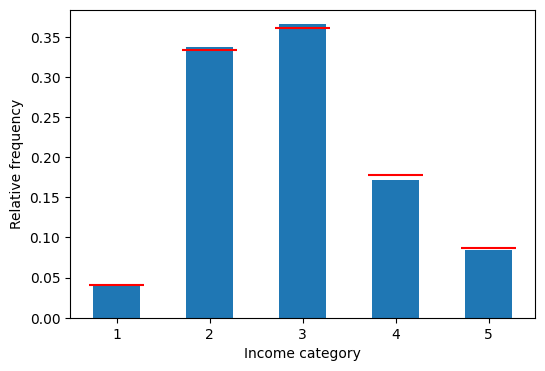

In [36]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

_ = income_cat_freq10000['상대도수'].plot(ax=ax, rot=0, kind='bar') # 막대그래프
ax.hlines(prob_X, np.arange(-0.3, 4), np.arange(0.3, 4.5), colors='red')
ax.set_xlabel('Income category')
ax.set_ylabel('Relative frequency')
plt.show()

동일한 그림을 추출된 표본 데이터 자체를 이용하여 그릴 수도 있다.
단, 아래 사항에 주의한다.

- `plt.hist()` 함수가 그리는 각 막대의 중심이 1.5, 2.5, 3.5, 4.5, 5.5 등으로 정해진다.
- 따라서 `plt.hlines()` 함수가 그리는 맨 왼편의 선분의 x-좌표가 1.15와 1.85로 지정되었다.

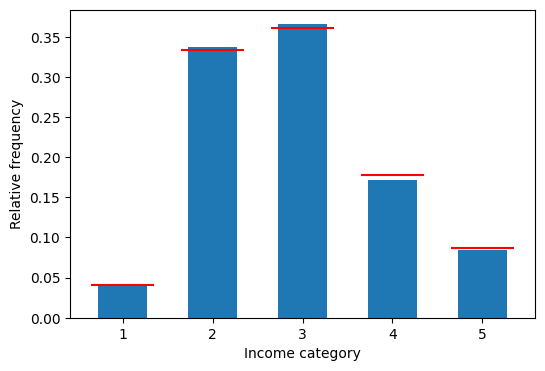

In [37]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

ax.hist(sample, bins=5, range=(1, 6), density=True, rwidth=0.54)
ax.hlines(prob_X, np.arange(1.15, 6), np.arange(1.85, 6), colors='red')

ax.set_xticks(np.linspace(1.5, 5.5, 5))
ax.set_xticklabels(np.arange(1, 6))
ax.set_xlabel('Income category')
ax.set_ylabel('Relative frequency')
plt.show()

## 연습문제

참고: [(연습) 확률분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability.ipynb)